In [1]:
!pip install plotly

# CUSTOMER SEGMENTATION #

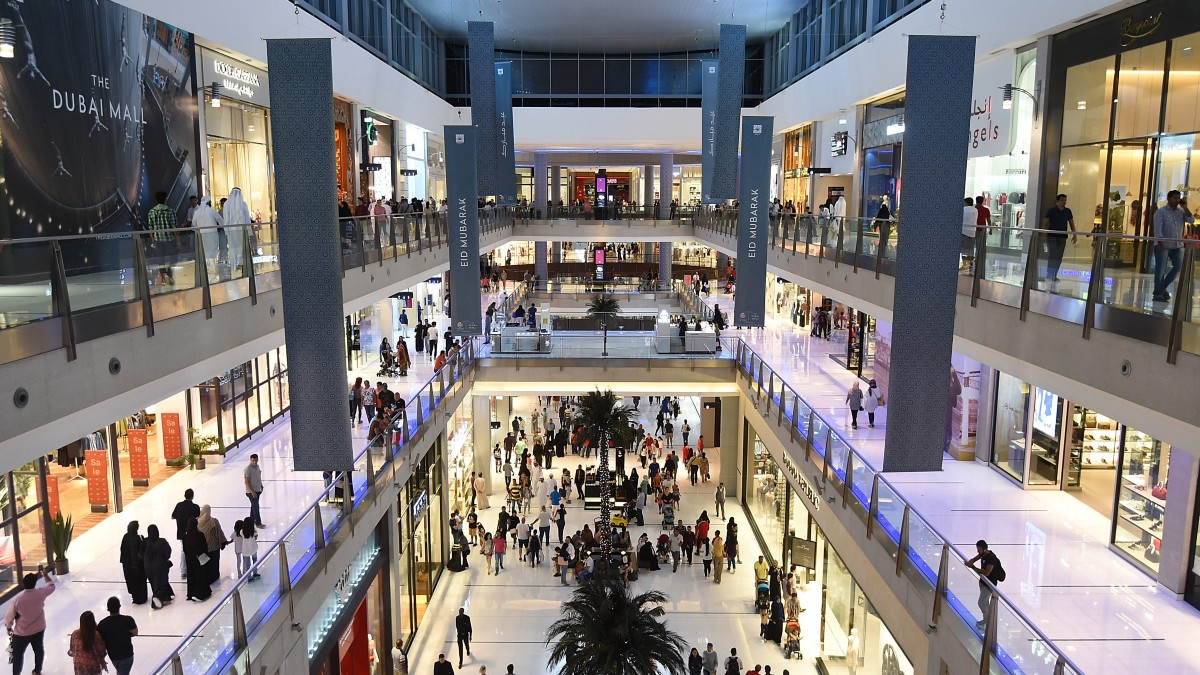

## STEPS IN THIS NOTEBOOK ##
1. Importing Libraries and Dataset
2. Exploratory Data Analysis
3. Data Visualizations
4. Clustering with K-Means, Elbow Method for Cluster numbers
5. Visualizing Clusters
6. 3D Plot of Clusters

### 1. Importing Libraries and Dataset ###

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import os
import warnings
warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected = True)
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
mall = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Exploratory Data Analysis ###

In [4]:
mall.shape

(200, 5)

In [5]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
mall.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### **It's great that we don't have any missing data** ####

In [9]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### 3. Data Visualizations ###

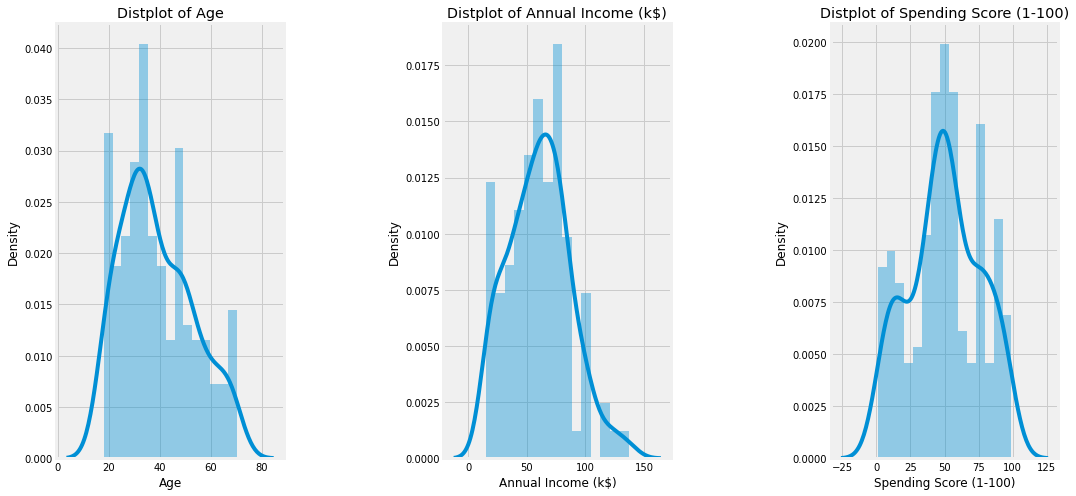

In [10]:
plt.figure(1 , figsize = (16 , 8))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.7 , wspace = 0.7)
    sns.distplot(mall[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

#### **What we see in these plots are:** ####
#### **1. Customers are mostly between their 30-40s.** ####
#### **2. Also most of the customers have more than 50k dollars as annual income.** ####
#### **3. The density of customers who have spending score higher than 50 are more than those who have spending score less than 50** ####

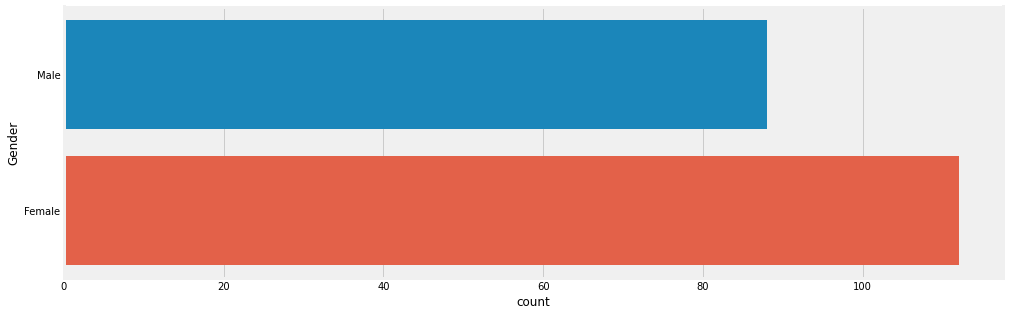

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = mall)
plt.show()

#### **In this plot we can see female customers are more than male customers** ####
#### **For plotting gender distrubition as percentage I used plotly below** ####

In [12]:
from plotly.offline import init_notebook_mode, iplot
col = "Gender"
grouped = mall[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})
colors = ['gold', 'navy']
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0],marker=dict(colors=colors, line=dict(color='#000000', width=2)))
layout = {'title': 'Gender Distrubition ( Male , Female )'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

#### **In here we see the distribution of gender as percentage.** ####
#### **56% of customers are women, 44% of customers are men.** ####
#### **I specifically adjusted gold and navy as colors because it's my favorite football team's colors.** ####
#### **(Huge applauses to those who can guess the name of the team :) )** ####

In [13]:
import plotly.express as px
def plot(col1,col2):
    fig = px.scatter(mall, x=col1, y=col2 , color="Gender", template = 'simple_white')
    return fig.show()

#### **Instead of plotting one by one, I've created an function for scatter plots** ####

In [14]:
plot('Annual Income (k$)', 'Spending Score (1-100)')

#### **In this plot we can conclude that there is a mass of those who have annual income between 40k - 70k dollars and spending score between 40-60.** ####

In [15]:
plot('Age', 'Spending Score (1-100)')

#### **In this plot we can conclude that, female customers younger than 50 have higher spending scores than female customers older than 50.** ####
#### **We can also see those female customers who are younger than 40, generally have high spending score.** ####
#### **Another fact to notice is that male customers who are younger than 40, generally have spending score more than 60** ####
#### **Also male customers who are older than 40, generally have spending score lower than 40.** ####
#### **In a result, just by looking only to this plot, we can say, customers younger than 40 have higher spending scores rather than those who are older than 40** ####

In [16]:
plot('Age', 'Annual Income (k$)')

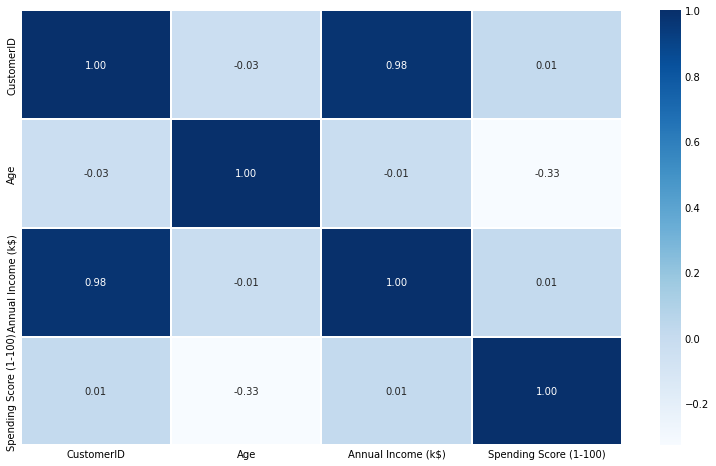

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(mall.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=2)
plt.show()

### 4. Clustering with K-Means, Elbow Method for Cluster numbers ###

#### Clustering using Age and Spending Score ####

In [18]:
values = mall[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(values)
    inertia.append(algorithm.inertia_)

### Cluster numbers determined by inertia (Squared Distance between Centroids and data points) ###

### 5. Visualizing Clusters ###

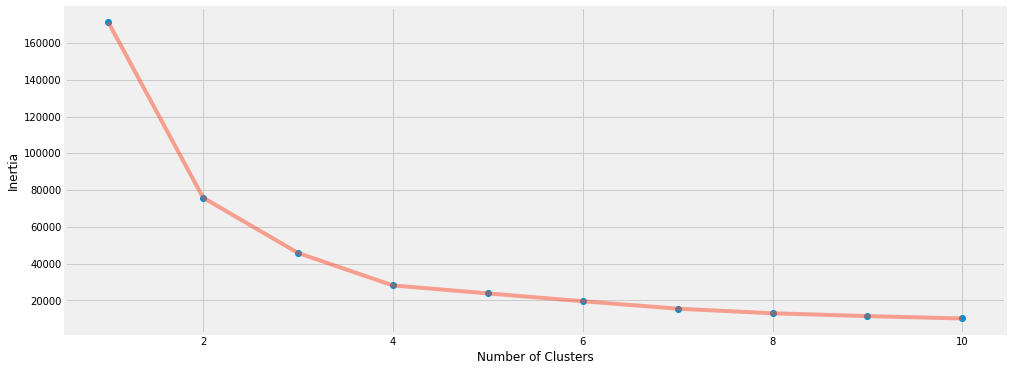

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [20]:
cluster_1 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
cluster_1.fit(values)
labels1 = cluster_1.labels_
centroids1 = cluster_1.cluster_centers_

In [21]:
h = 0.02
x_min, x_max = values[:, 0].min() - 1, values[:, 0].max() + 1
y_min, y_max = values[:, 1].min() - 1, values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = cluster_1.predict(np.c_[xx.ravel(), yy.ravel()]) 

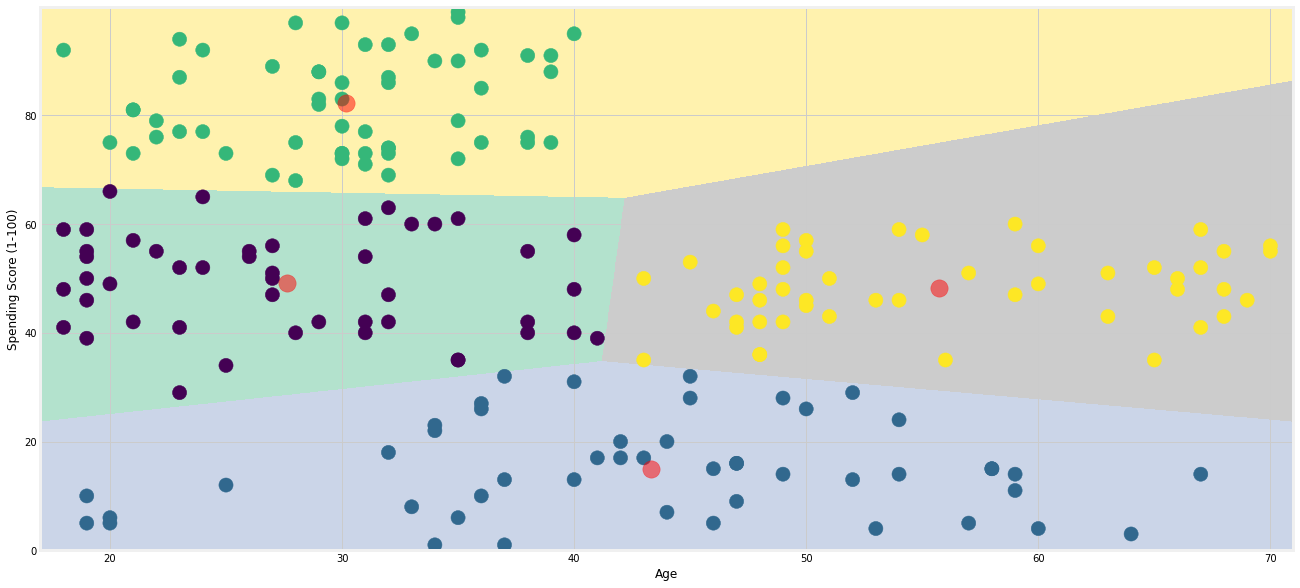

In [22]:
plt.figure(1 , figsize = (20 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = mall , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

#### Clustering using Annual Income and Spending Score ####

##### This time I'll use 5 clusters #####

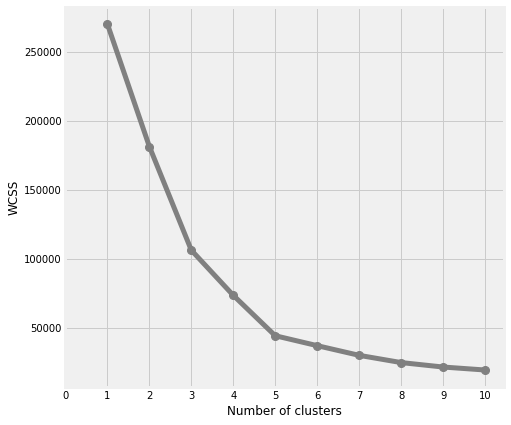

In [23]:
x = mall.iloc[:,[3,4]].values
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=5, markersize=8,marker='o',color = 'grey')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
cluster_2 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

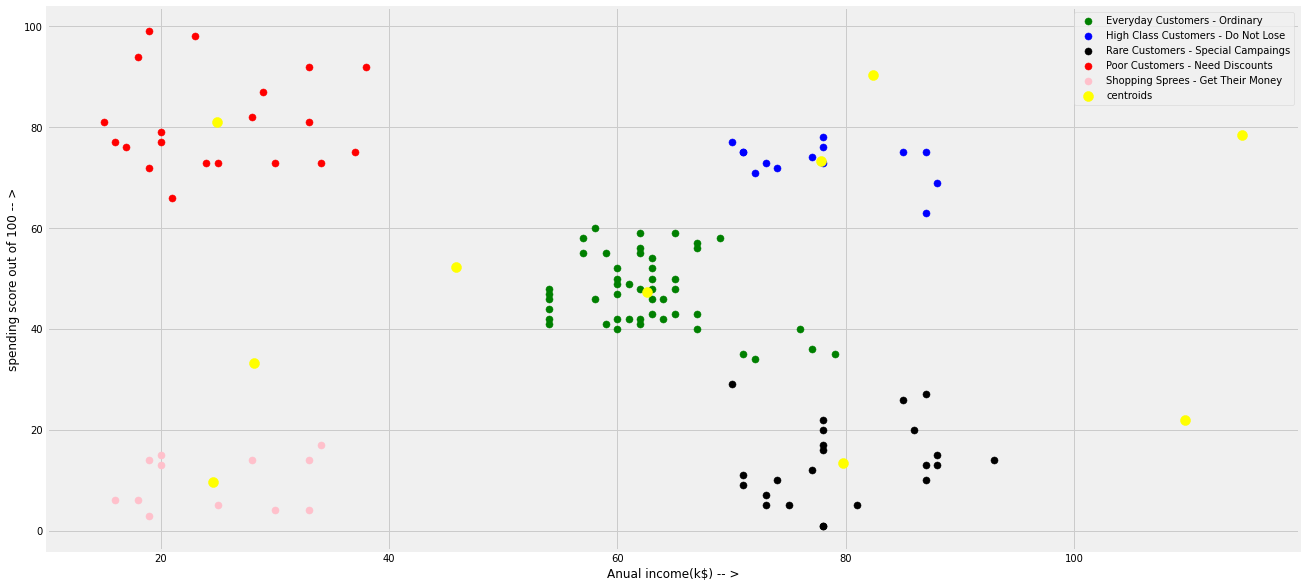

In [24]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "Everyday Customers - Ordinary ")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "High Class Customers - Do Not Lose")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "Rare Customers - Special Campaings")
plt.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],s = 50, c = 'red', label = "Poor Customers - Need Discounts")
plt.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],s = 50, c = 'pink', label = "Shopping Sprees - Get Their Money")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Anual income(k$) -- >")
plt.ylabel("spending score out of 100 -- >")
plt.legend()
plt.show()

### 6. Visualizing Clusters on 3D Plot ###

In [25]:
cluster_3 = mall[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(cluster_3)
    inertia.append(algorithm.inertia_)

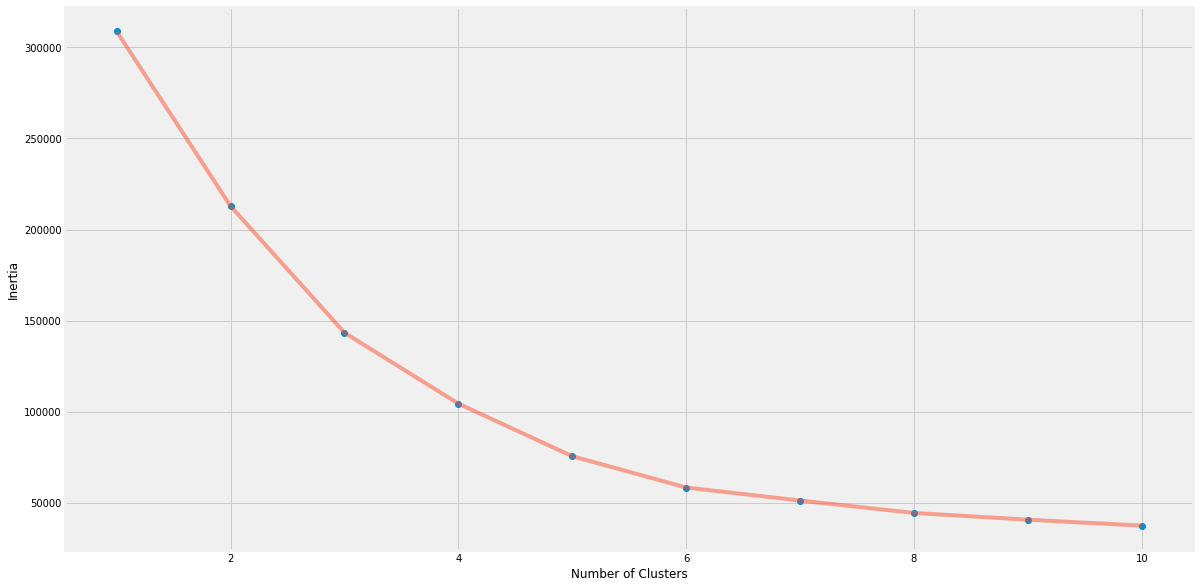

In [26]:
plt.figure(1 , figsize = (18 ,10))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [27]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(cluster_3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [28]:
mall['label3'] =  labels3
trace1 = go.Scatter3d(
    x= mall['Age'],
    y= mall['Spending Score (1-100)'],
    z= mall['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = mall['label3'], 
        size= 20,
        line=dict(
            color= mall['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters in 3D Plot',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


## **IF YOU LIKE THIS NOTEBOOK PLEASE UPVOTE** ####

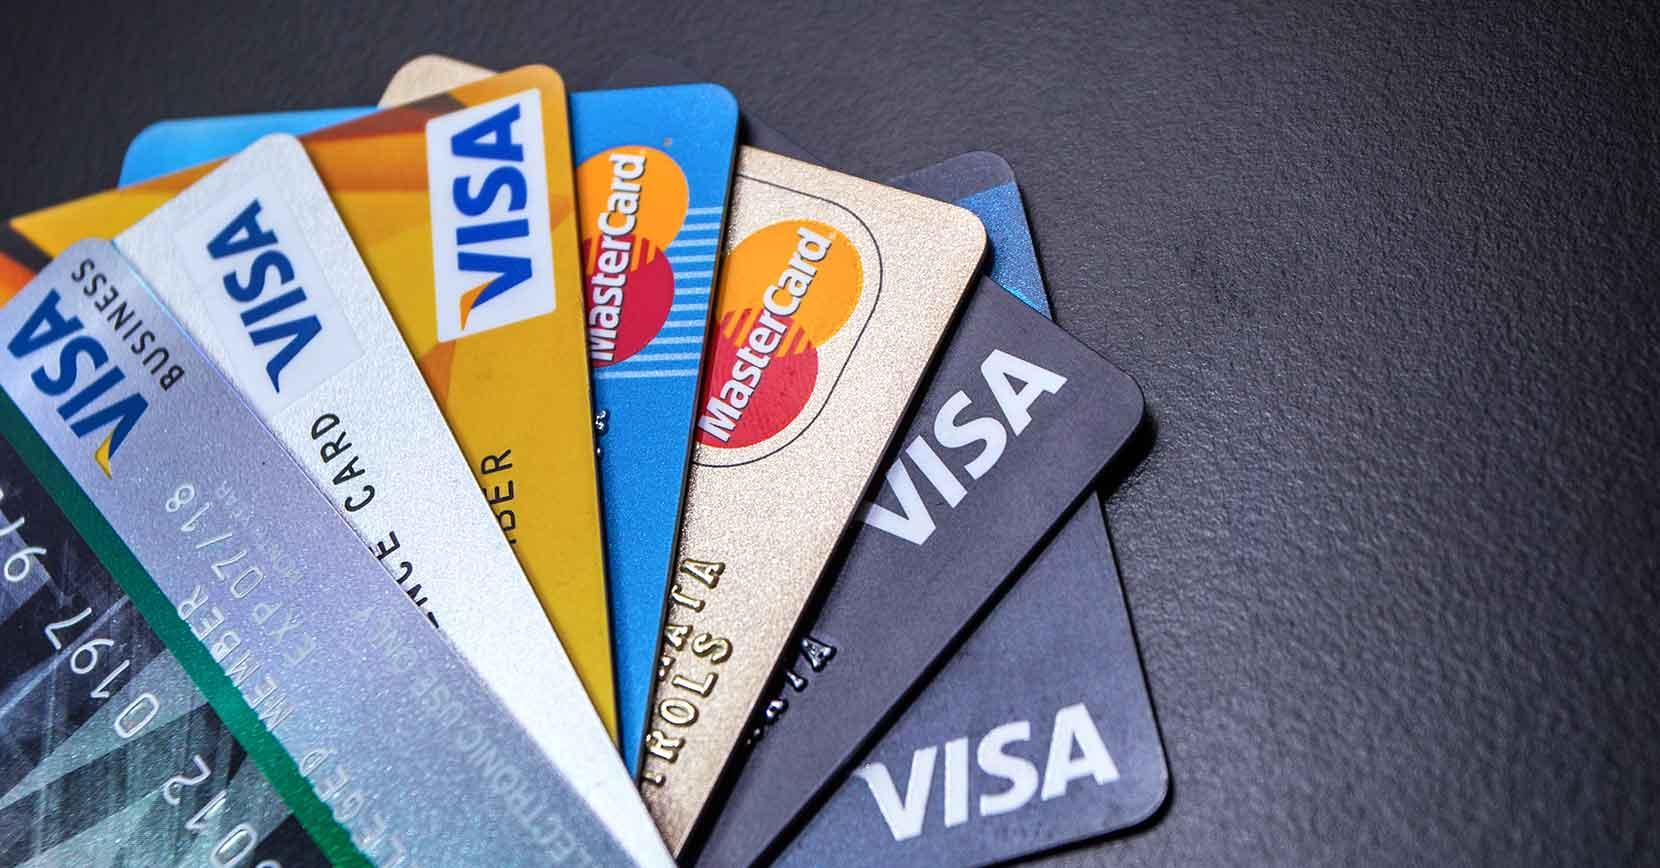